   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

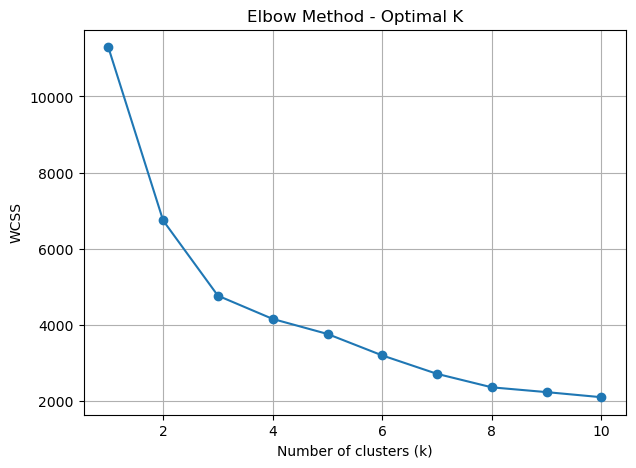

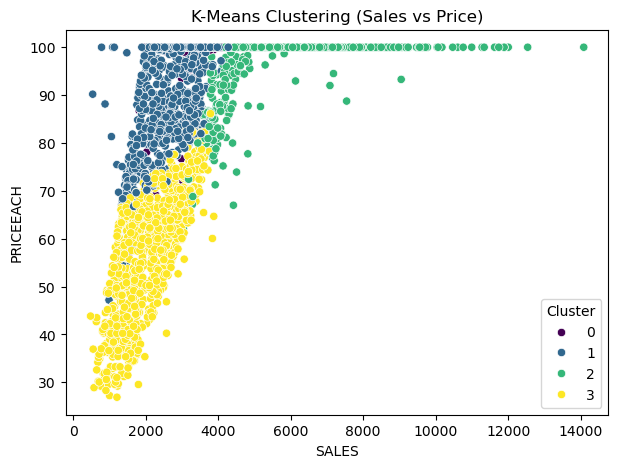

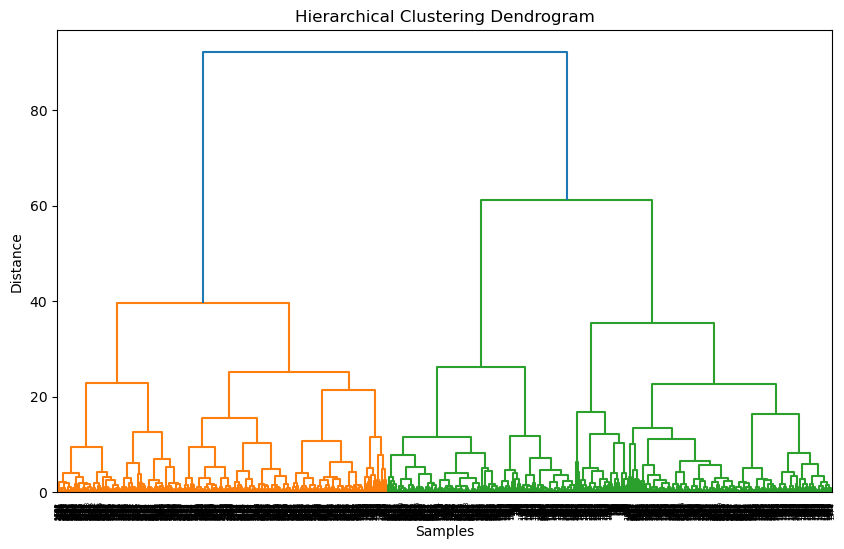


Cluster Centers (after scaling):
[[-0.64455883  0.76026415  0.34668761  1.3518209 ]
 [-0.6885075   0.34159736 -0.44321989 -0.20420883]
 [ 1.02464695  0.67642774  1.19619378  0.51647042]
 [ 0.09973938 -1.3459346  -0.81389205 -0.96072826]]

Cluster counts:
Cluster
1    826
3    826
2    744
0    427
Name: count, dtype: int64


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# 1️ Load dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Show dataset info
print(df.head())
print("\nColumns:\n", df.columns)

# 2️ Select useful numerical features for clustering
# (You can adjust these depending on dataset columns)
num_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

# Drop rows with missing values
df = df[num_features].dropna()

# 3️ Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 4️ Elbow method to find optimal number of clusters
wcss = []  # Within-Cluster-Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow graph
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# 5️ Choose k (for example, from elbow plot, usually around 3–5)
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 6️ Visualize clusters (using first two features)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['SALES'], y=df['PRICEEACH'], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering (Sales vs Price)')
plt.show()

# 7️ Optional: Hierarchical Clustering (Dendrogram)
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# 8️ Print cluster summary
print("\nCluster Centers (after scaling):")
print(kmeans.cluster_centers_)

print("\nCluster counts:")
print(df['Cluster'].value_counts())
